In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
Z = 16

In [2]:
covid = pd.read_csv("Coronavirus_Norway.csv")
covid.Date = pd.to_datetime(covid.Date)
covid.set_index('Date', inplace=True)
xfin = covid.index[-1]
#xquarini = '2020-03-09'
#xplus5 = '2020-03-14' #5th day from quarantine
ymax = 2000
xini = '2020-02-26'

In [3]:
covid.head()

,Dead,Total
Date,,
2020-02-26,0,1
2020-02-27,0,4
2020-02-28,0,7
2020-02-29,0,15
2020-03-01,0,19


In [4]:
covid.tail()

,Dead,Total
Date,,
2020-03-16,3,1169
2020-03-17,3,1308
2020-03-18,3,1423
2020-03-19,6,1552
2020-03-20,7,1742


In [5]:
colors = [(1.0, 0.2, 0.2), #Infected
          (0.3, 0.3, 0.3), #Dead
          (0.2, 0.7, 0.2), #Recovered
          (0.0, 0.4, 0.8)] #Total
c_span = (0.9, 0.6, 0.9)
c_5 = (0.8, 0.1, 0.8)
xticks = [t for t in covid.index if ((t.day-29)%5 == 0 and t.month == 2) or ((t.day)%5 == 0 and t.month != 2)]
xticklabels = [t.strftime('%b-%d') for t in xticks]
print(xticklabels)

['Feb-29', 'Mar-05', 'Mar-10', 'Mar-15', 'Mar-20']


In [6]:
covid['Total_perc'] = covid['Total'].pct_change()*100
covid['Dead_perc'] = covid['Dead'].pct_change()*100

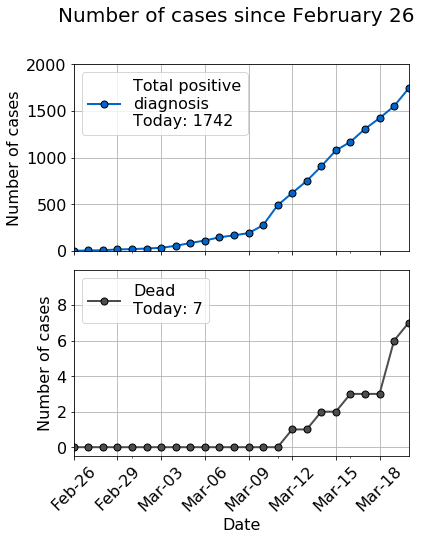

In [7]:
labels = ['Total positive\ndiagnosis\nToday: {}'.format(covid.Total[-1]),
          'Dead\nToday: {}'.format(covid.Dead[-1])]
dates = pd.date_range(xini, xfin, freq='3D')
dateticks = [t.strftime('%b-%d') for t in dates]

fig, axs = plt.subplots(figsize=(6,8), nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
covid.plot(y=['Total'], ax=axs[0], grid=True, color=colors[3], marker='o', markersize=7, linewidth=2, markeredgecolor='k', markeredgewidth=1, xticks=[], x_compat=True)
covid.plot(y=['Dead'], ax=axs[1], grid=True, color=colors[1], marker='o', markersize=7, linewidth=2, markeredgecolor='k', markeredgewidth=1, xticks=[], x_compat=True)
fig.suptitle('Number of cases since February 26', fontsize=Z+4)
for ax, lab in zip(axs.flatten(), labels):
    #quarspan = ax.axvspan(xmin=xquarini, xmax=xfin, color=c_span, alpha=0.1, zorder=0)
    #quar = ax.axvline(xplus5, c=c_5, lw=2.5, zorder=1)
    ax.set_xlim(xini, xfin)
    ax.set_xticks(dates)
    ax.set_xticklabels(dateticks, rotation=45)
    ax.tick_params(labelsize=Z)
    ax.set_xlabel("Date", fontsize=Z)
    ax.set_ylabel("Number of cases", fontsize=Z)
    #legend1 = plt.legend([quarspan, quar], ['National quarantine', '+5 days from quarantine start'], loc='upper center', bbox_to_anchor=(-0.1,2.32), fontsize=Z, ncol=2)
    ax.legend([lab], fontsize=Z, loc='upper left')
axs[0].set_ylim(-0.5, ymax)
axs[0].set_yticks(np.arange(0, ymax+1, 500))
axs[1].set_ylim(-0.5, 10)
axs[1].set_yticks(np.arange(0, 10, 2))
#plt.gca().add_artist(legend1)
plt.savefig("Cases_NOR.png", dpi=300, format='png')
plt.show()
plt.close()

C:\Users\fsebastian\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
C:\Users\fsebastian\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


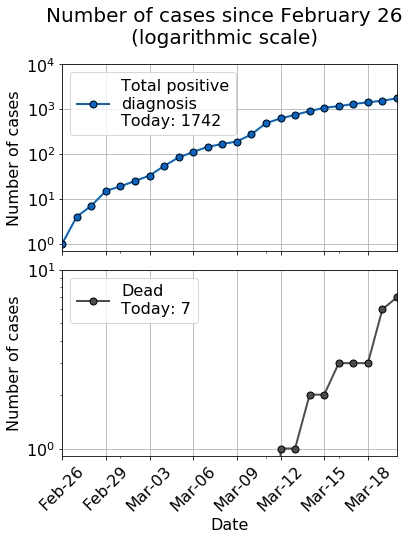

In [8]:
labels = ['Total positive\ndiagnosis\nToday: {}'.format(covid.Total[-1]),
          'Dead\nToday: {}'.format(covid.Dead[-1])]
dates = pd.date_range(xini, xfin, freq='3D')
dateticks = [t.strftime('%b-%d') for t in dates]

fig, axs = plt.subplots(figsize=(6,8), nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
covid.plot(y=['Total'], ax=axs[0], grid=True, color=colors[3], logy=True, marker='o', markersize=7, linewidth=2, markeredgecolor='k', markeredgewidth=1, xticks=[], x_compat=True)
covid.plot(y=['Dead'], ax=axs[1], grid=True, color=colors[1], logy=True, marker='o', markersize=7, linewidth=2, markeredgecolor='k', markeredgewidth=1, xticks=[], x_compat=True)
fig.suptitle('Number of cases since February 26\n(logarithmic scale)', fontsize=Z+4)
for ax, lab in zip(axs.flatten(), labels):
    #quarspan = ax.axvspan(xmin=xquarini, xmax=xfin, color=c_span, alpha=0.1, zorder=0)
    #quar = ax.axvline(xplus5, c=c_5, lw=2.5, zorder=1)
    ax.set_xlim(xini, xfin)
    ax.set_xticks(dates)
    ax.set_xticklabels(dateticks, rotation=45)
    ax.tick_params(labelsize=Z)
    ax.set_xlabel("Date", fontsize=Z)
    ax.set_ylabel("Number of cases", fontsize=Z)
    #legend1 = plt.legend([quarspan, quar], ['National quarantine', '+5 days from quarantine start'], loc='upper center', bbox_to_anchor=(-0.1,2.32), fontsize=Z, ncol=2)
    ax.legend([lab], fontsize=Z, loc='upper left')
axs[0].set_ylim(-0.5, ymax)
axs[0].set_yticks(np.logspace(0, 4, 5))
axs[1].set_ylim(0, 2)
axs[1].set_yticks(np.logspace(0, 1, 2))
#plt.gca().add_artist(legend1)
plt.savefig("Caseslog_NOR.png", dpi=300, format='png')
plt.show()
plt.close()

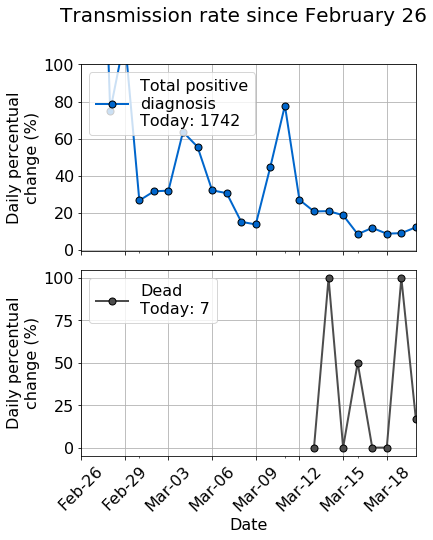

In [9]:
labels = ['Total positive\ndiagnosis\nToday: {}'.format(covid.Total[-1]),
          'Dead\nToday: {}'.format(covid.Dead[-1])]
dates = pd.date_range(xini, xfin, freq='3D')
dateticks = [t.strftime('%b-%d') for t in dates]

fig, axs = plt.subplots(figsize=(6,8), nrows=2, ncols=1, sharex=True, sharey=False, gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
covid.plot(y=['Total_perc'], ax=axs[0], grid=True, color=colors[3], marker='o', markersize=7, linewidth=2, markeredgecolor='k', markeredgewidth=1, xticks=[], x_compat=True)
covid.plot(y=['Dead_perc'], ax=axs[1], grid=True, color=colors[1], marker='o', markersize=7, linewidth=2, markeredgecolor='k', markeredgewidth=1, xticks=[], x_compat=True)
fig.suptitle('Transmission rate since February 26', fontsize=Z+4)
for ax, lab in zip(axs.flatten(), labels):
    #quarspan = ax.axvspan(xmin=xquarini, xmax=xfin, color=c_span, alpha=0.1, zorder=0)
    #quar = ax.axvline(xplus5, c=c_5, lw=2.5, zorder=1)
    ax.set_xlim(xini, xfin)
    ax.set_xticks(dates)
    ax.set_xticklabels(dateticks, rotation=45)
    ax.tick_params(labelsize=Z)
    ax.set_xlabel("Date", fontsize=Z)
    ax.set_ylabel("Daily percentual\nchange (%)", fontsize=Z)
    #legend1 = plt.legend([quarspan, quar], ['National quarantine', '+5 days from quarantine start'], loc='upper center', bbox_to_anchor=(-0.1,2.32), fontsize=Z, ncol=2)
    ax.legend([lab], fontsize=Z, loc='upper left')
axs[0].set_ylim(-0.5, 100)
axs[0].set_yticks(np.arange(0,101,20))
#axs[1].set_ylim(0, 2)
#axs[1].set_yticks(np.logspace(0, 1, 2))
#plt.gca().add_artist(legend1)
plt.savefig("Transmission_NOR.png", dpi=300, format='png')
plt.show()
plt.close()